In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load CSV and show the first five rows
df = pd.read_csv('../data/GTSRB/Train.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


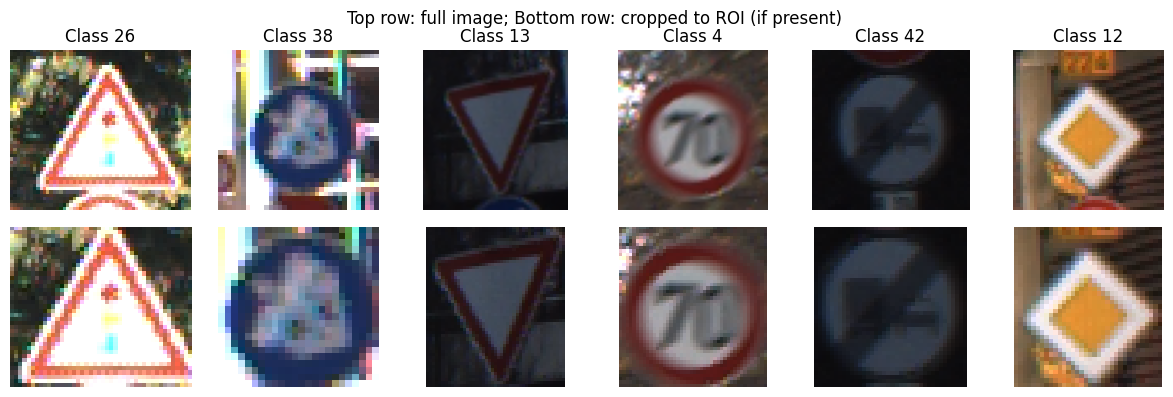

In [3]:
# Plot some samples with and without ROI cropping
from pathlib import Path

base_dir = Path('../data/GTSRB')

# sample 6 images
sample = df.sample(n=6, random_state=1).reset_index(drop=True)

fig, axes = plt.subplots(2, 6, figsize=(12, 4))
# ensure axes is 2D
import numpy as _np
if _np.asarray(axes).ndim == 1:
    axes = _np.reshape(axes, (2, -1))

cols = df.columns
has_roi = {'Roi.X1','Roi.Y1','Roi.X2','Roi.Y2'}.issubset(cols)

for i, row in sample.iterrows():
    img_rel_path = row['Path']  # e.g., Train/20/...
    img_path = base_dir / img_rel_path
    if not img_path.exists():
        # Show placeholder if file not found
        axes[0, i].text(0.5, 0.5, f"Missing:\n{img_rel_path}", ha='center', va='center')
        axes[0, i].axis('off')
        axes[1, i].axis('off')
        continue
    img = Image.open(img_path).convert('RGB')
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Class {row['ClassId']}")

    if has_roi:
        x1, y1, x2, y2 = int(row['Roi.X1']), int(row['Roi.Y1']), int(row['Roi.X2']), int(row['Roi.Y2'])
        # clip coordinates to image bounds
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(img.width, x2), min(img.height, y2)
        if x2 > x1 and y2 > y1:
            cropped = img.crop((x1, y1, x2, y2))
        else:
            cropped = img
    else:
        cropped = img
    axes[1, i].imshow(cropped)
    axes[1, i].axis('off')

fig.suptitle('Top row: full image; Bottom row: cropped to ROI (if present)')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
